In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

plt.rcParams["figure.dpi"] = 60


Load the result.csv file got from the Simulation

In [82]:
df = pd.read_csv("result.csv")


In [83]:
# Parse the vectors
def parse_vector_column(column):
    return column.apply(
        lambda x: np.fromstring(
            x.strip("[]"),
            sep=" "
        )
    )

# Parse vectors
df["Velocity_vec"] = parse_vector_column(df["Velocity [m/s]"])
df["Ejection_vec"] = parse_vector_column(df["Ejection Velocity [m/s]"])
df["Position_vec"] = parse_vector_column(df["Position [m]"])

In [84]:
# Velocity components
df["Vx"] = df["Velocity_vec"].apply(lambda x: x[0])
df["Vy"] = df["Velocity_vec"].apply(lambda x: x[1])
df["Vz"] = df["Velocity_vec"].apply(lambda x: x[2])

# Velocity norm
df["Velocity_norm"] = df["Velocity_vec"].apply(np.linalg.norm)

# Ejection velocity components
df["Evx"] = df["Ejection_vec"].apply(lambda x: x[0])
df["Evy"] = df["Ejection_vec"].apply(lambda x: x[1])
df["Evz"] = df["Ejection_vec"].apply(lambda x: x[2])

df["Ejection_norm"] = df["Ejection_vec"].apply(np.linalg.norm)


In [85]:
df["Mass_to_Area"] = df["Mass [kg]"] / df["Area [m^2]"]
df["Velocity_ratio"] = df["Ejection_norm"] / df["Velocity_norm"]
df["Log_Mass"] = np.log10(df["Mass [kg]"])

In [86]:
# Head of the DataFrame to check the new columns
df.head()

,ID,Name,Satellite Type,Characteristic Length [m],A/M [m^2/kg],Area [m^2],Mass [kg],Ejection Velocity [m/s],Velocity [m/s],Position [m],...,Vy,Vz,Velocity_norm,Evx,Evy,Evz,Ejection_norm,Mass_to_Area,Velocity_ratio,Log_Mass
0,24947,IRIDIUM 33-Collision-Fragment,DEBRIS,0.091837,0.085655,0.004645,0.054227,[-2.015447610836788 -10.251525387141994 -15.26...,[-218.35435221435935 407.9945050072612 7433.54...,[6508917.055099439 2974483.386663436 14901.218...,...,407.994505,7433.544607,7447.934181,-2.015448,-10.251525,-15.264825,18.497856,11.674703,0.002484,-1.265788
1,24948,IRIDIUM 33-Collision-Fragment,DEBRIS,0.052339,0.142819,0.001505,0.010535,[-61.14491961330321 45.9859652025001 -4.696986...,[-277.4838242168258 464.2319955969033 7444.112...,[6508917.055099439 2974483.386663436 14901.218...,...,464.231996,7444.112446,7463.733565,-61.144920,45.985965,-4.696986,76.651627,7.001845,0.010270,-1.977362
2,24949,IRIDIUM 33-Collision-Fragment,DEBRIS,0.071232,0.079292,0.002791,0.035199,[-119.96107790043936 -271.0899690459245 76.249...,[-336.2999825039619 147.15606134847872 7525.05...,[6508917.055099439 2974483.386663436 14901.218...,...,147.156061,7525.059397,7534.007666,-119.961078,-271.089969,76.249965,306.095555,12.611629,0.040629,-1.453468
3,24950,IRIDIUM 33-Collision-Fragment,DEBRIS,0.050487,0.148681,0.001400,0.009415,[-103.61231905011395 65.42652876075941 66.4278...,[-319.95122365363653 483.6725591551626 7515.23...,[6508917.055099439 2974483.386663436 14901.218...,...,483.672559,7515.237316,7537.579177,-103.612319,65.426529,66.427884,139.387256,6.725818,0.018492,-2.026192
4,24951,IRIDIUM 33-Collision-Fragment,DEBRIS,0.167033,0.087969,0.015408,0.175156,[20.17406339004246 -17.000744634486143 -13.913...,[-196.16484121348012 401.24528575991707 7434.8...,[6508917.055099439 2974483.386663436 14901.218...,...,401.245286,7434.895580,7448.298511,20.174063,-17.000745,-13.913852,29.826388,11.367617,0.004004,-0.756574


In [87]:
# Check the columns and summary statistics
df.columns
df.describe()

,ID,Characteristic Length [m],A/M [m^2/kg],Area [m^2],Mass [kg],Semi-Major-Axis [m],Eccentricity,Inclination [rad],Longitude of the ascending node [rad],Argument of periapsis [rad],...,Vy,Vz,Velocity_norm,Evx,Evy,Evz,Ejection_norm,Mass_to_Area,Velocity_ratio,Log_Mass
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1.056000e+03,1056.000000,1056.000000,1056.000000,1056.000000,...,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,25474.500000,0.115821,0.164470,0.016671,0.260641,7.666294e+06,0.041425,1.444925,0.428381,3.171116,...,837.932782,7367.377395,7471.165455,-18.041284,8.939129,0.302505,236.332058,17.052328,0.031220,-1.345918
std,304.985246,0.129042,0.206983,0.078146,1.342767,1.551666e+07,0.125686,0.104246,0.000226,1.835041,...,723.494631,390.090747,380.502907,266.336638,305.745245,366.092474,492.888576,31.546503,0.060933,0.677365
min,24947.000000,0.050058,0.001626,0.001376,0.000670,3.242165e+06,0.000315,0.920372,0.427064,0.000182,...,-4062.377232,3759.903418,4033.299210,-4289.359368,-4480.623262,-3688.906014,0.538377,0.434590,0.000072,-3.173768
25%,25210.750000,0.059465,0.057248,0.001943,0.015725,7.063972e+06,0.007174,1.304531,0.428080,1.718211,...,405.839338,7191.870744,7414.644193,-50.485236,-37.780738,-45.766066,43.192440,5.339809,0.005793,-1.803407
50%,25474.500000,0.076397,0.103305,0.003211,0.041945,7.149119e+06,0.015157,1.503585,0.428508,3.215693,...,448.245390,7425.070193,7459.401300,-0.907245,3.168669,-0.479452,103.221293,9.680163,0.013819,-1.377316
75%,25738.250000,0.114835,0.187273,0.007270,0.106122,7.227977e+06,0.037213,1.509250,0.428520,4.425837,...,1778.090323,7467.650733,7500.303311,36.388581,42.385279,36.391387,237.903537,17.467997,0.031841,-0.974206
max,26002.000000,1.730664,2.301019,1.672474,23.687929,5.109843e+08,3.172141,1.827291,0.429194,6.283168,...,4004.049553,14756.106182,15308.164643,1732.366241,3585.803523,7307.296750,8197.034525,614.924268,0.987745,1.374527


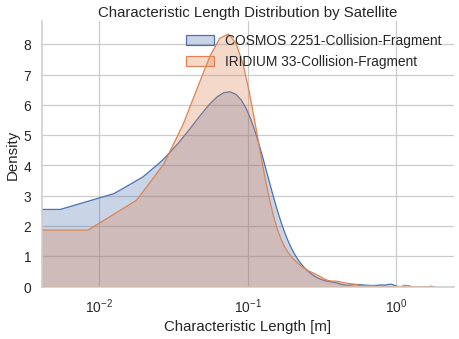

In [88]:
# KDE plot of characteristic length by satellite

plt.figure(figsize=(8,6))

for name, group in df.groupby("Name"):
    sns.kdeplot(
        group["Characteristic Length [m]"],
        label=name,
        fill=True,
        alpha=0.3
    )

plt.xscale("log")
plt.title("Characteristic Length Distribution by Satellite")
plt.xlabel("Characteristic Length [m]")
plt.legend()
plt.tight_layout()
plt.show()


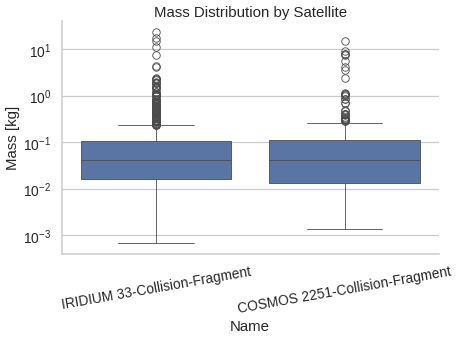

In [89]:
# KDE plot of mass by satellite
plt.figure(figsize=(8,6))
sns.boxplot(
    x="Name",
    y="Mass [kg]",
    data=df
)

plt.yscale("log")
plt.xticks(rotation=10)
plt.title("Mass Distribution by Satellite")
plt.tight_layout()
plt.show()

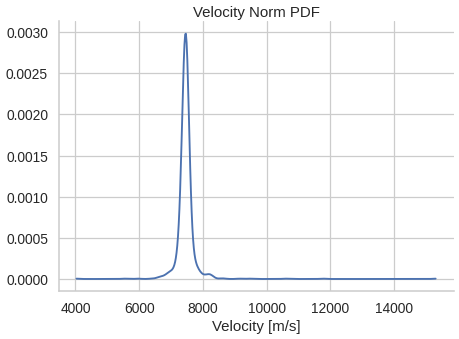

In [90]:
# KDE plot of velocity norm (not divided by satellite, just overall distribution)
data = df["Velocity_norm"]

kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 500)

plt.figure(figsize=(8,6))
plt.plot(x, kde(x))
plt.title("Velocity Norm PDF")
plt.xlabel("Velocity [m/s]")
plt.tight_layout()
plt.show()


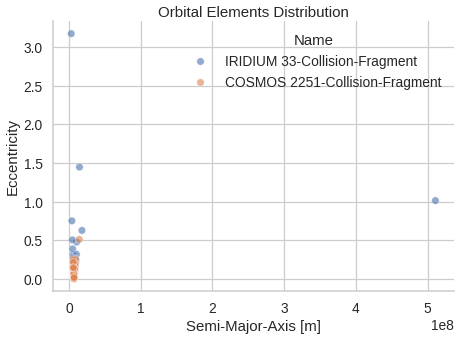

In [93]:
# Scatter plot example

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x="Semi-Major-Axis [m]",
    y="Eccentricity",
    hue="Name",
    alpha=0.6
)

plt.title("Orbital Elements Distribution")
plt.tight_layout()
plt.show()


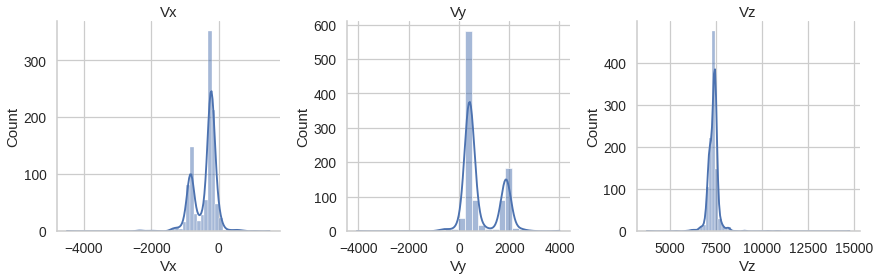

In [94]:
# Histograms of velocity components
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df["Vx"], kde=True, ax=axes[0])
sns.histplot(df["Vy"], kde=True, ax=axes[1])
sns.histplot(df["Vz"], kde=True, ax=axes[2])

axes[0].set_title("Vx")
axes[1].set_title("Vy")
axes[2].set_title("Vz")

plt.tight_layout()
plt.show()


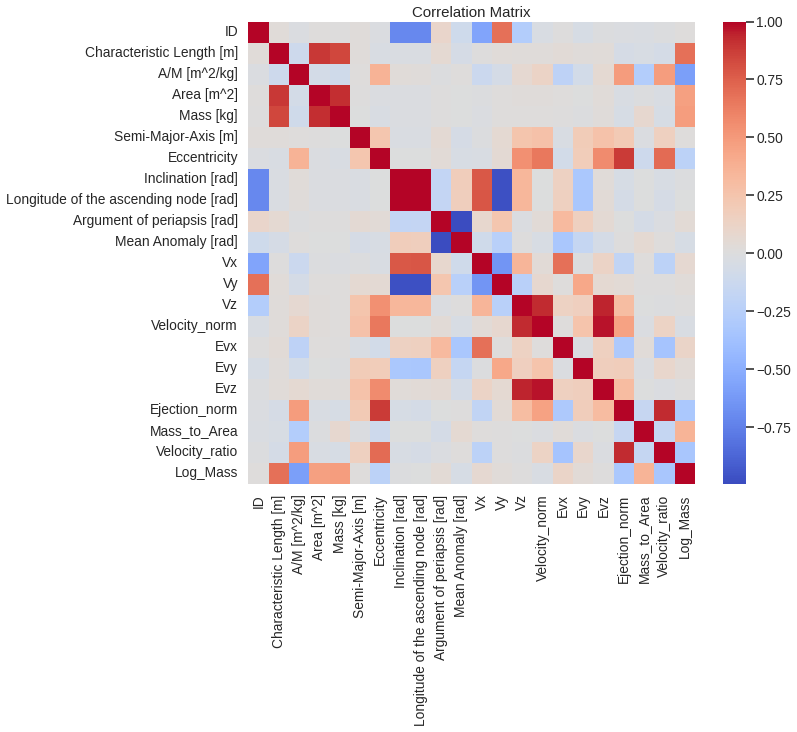

In [95]:
# Correlation matrix of features (maybe trivial but not for me lol)
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,10))
sns.heatmap(
    numerical_df.corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix")
plt.show()


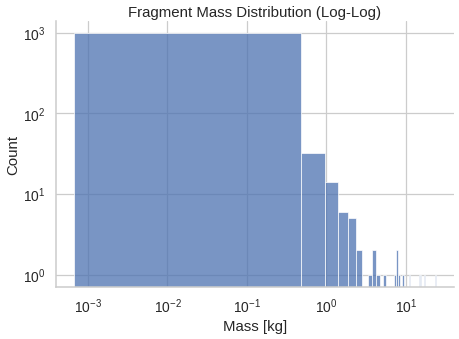

In [96]:
# Log-log histogram of mass distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Mass [kg]"], bins=50)

plt.xscale("log")
plt.yscale("log")

plt.title("Fragment Mass Distribution (Log-Log)")
plt.tight_layout()
plt.show()


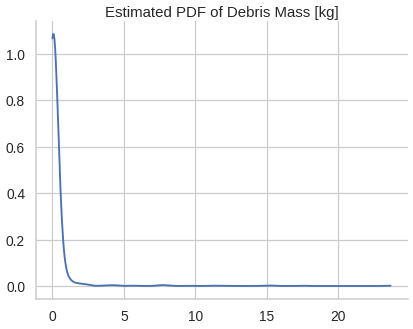

In [97]:
data = df["Mass [kg]"].dropna()

kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 500)
y = kde(x)

plt.figure()
plt.plot(x, y)
plt.title("Estimated PDF of Debris Mass [kg]")
plt.show()


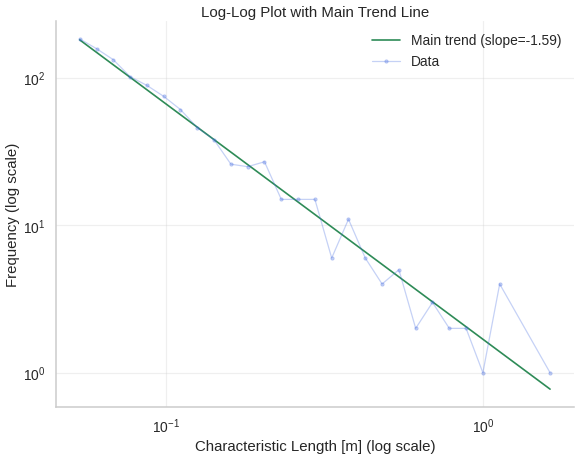

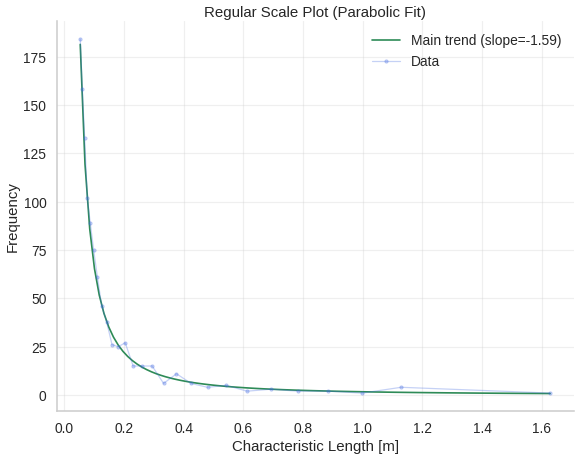

Log-log fit: slope = -1.595, intercept = 0.226
Regular space parabola: y = 1.68e+00 * x^-1.595
R-squared = 0.962


In [ ]:
# Characteristic length histogram and log-log fit to find the main trend line (power law)

lengths = df["Characteristic Length [m]"].values
lengths = lengths[lengths > 0]  # ignore any zero/negative just in case

bins = np.logspace(np.log10(lengths.min()), np.log10(lengths.max()), 30)
hist, bin_edges = np.histogram(lengths, bins=bins)
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

valid_indices = hist > 0
bin_centers_valid = bin_centers[valid_indices]
hist_valid = hist[valid_indices]

# LOG-LOG PLOT
plt.figure(figsize=(10, 8))

log_x = np.log10(bin_centers_valid)
log_y = np.log10(hist_valid)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)

x_fit = np.linspace(bin_centers_valid.min(), bin_centers_valid.max(), 100)
log_x_fit = np.log10(x_fit)
log_y_fit = slope * log_x_fit + intercept
y_fit = 10**log_y_fit
plt.plot(x_fit, y_fit, color='#2E8B57', linewidth=2, label=f'Main trend (slope={slope:.2f})')

plt.plot(bin_centers_valid, hist_valid, marker='o', linestyle='-', 
         color='#4169E1', linewidth=1.5, markersize=4, alpha=0.3, label='Data')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Characteristic Length [m] (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Log-Log Plot with Main Trend Line")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# NON-LOG-LOG VERSION
plt.figure(figsize=(10, 8))

a = 10**intercept
b = slope

x_regular = np.linspace(bin_centers_valid.min(), bin_centers_valid.max(), 100)
y_regular_parabola = a * (x_regular ** b)

plt.plot(x_fit, y_fit, color='#2E8B57', linewidth=2, label=f'Main trend (slope={slope:.2f})')

plt.plot(bin_centers_valid, hist_valid, marker='o', linestyle='-', 
         color='#4169E1', linewidth=1.5, markersize=4, alpha=0.3, label='Data')

plt.xlabel("Characteristic Length [m]")
plt.ylabel("Frequency")
plt.title("Regular Scale Plot (Parabolic Fit)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print fit parameters
print(f"Log-log fit: slope = {slope:.3f}, intercept = {intercept:.3f}")
print(f"Regular space parabola: y = {a:.2e} * x^{b:.3f}")
print(f"R-squared = {r_value**2:.3f}")

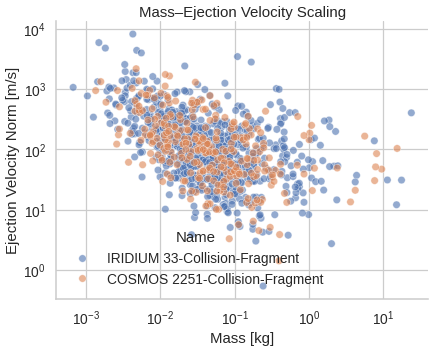

In [ ]:
# Scatter plot of mass vs ejection velocity with log-log scale
plt.figure()

sns.scatterplot(
    x=df["Mass [kg]"],
    y=df["Ejection_norm"],
    hue=df["Name"],
    alpha=0.6
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Mass [kg]")
plt.ylabel("Ejection Velocity Norm [m/s]")
plt.title("Mass–Ejection Velocity Scaling")
plt.show()

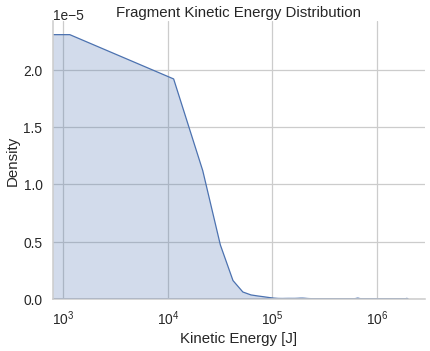

In [ ]:
# Calculate kinetic energy and plot its distribution

df["Kinetic_Energy"] = 0.5 * df["Mass [kg]"] * df["Ejection_norm"]**2

energy = df["Kinetic_Energy"]

plt.figure()
sns.kdeplot(energy, fill=True)
plt.xscale("log")
plt.xlabel("Kinetic Energy [J]")
plt.title("Fragment Kinetic Energy Distribution")
plt.show()


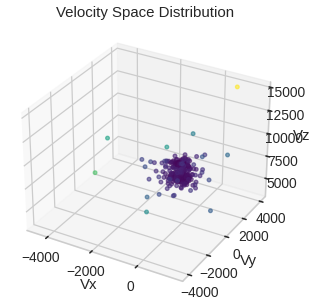

In [ ]:
# 3D scatter plot of velocity components colored by ejection velocity norm

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Vx"],
    df["Vy"],
    df["Vz"],
    c=df["Ejection_norm"],
    cmap="viridis",
    alpha=0.6
)

ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
ax.set_zlabel("Vz")

plt.title("Velocity Space Distribution")
plt.show()
